In [1]:
library(data.table)
library(tidyverse)
library(magrittr)
library(plotly)
library(ggplot2)

library(broom) # for tidy statistical summaries
library(caret) # for regression performance measures
library(psych) # for pairwise comparisons
library(GGally) # for pairwise comparisons
library(lindia) # for qqplots
library(car)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()

In [2]:
odata <- fread("http://raw.githubusercontent.com/elifsakcay/ad48g-proje/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic%5B1%5D.csv")

In [3]:
odata

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
Female,23,1.50,55.0,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
Male,22,1.64,53.0,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,24,1.78,64.0,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight


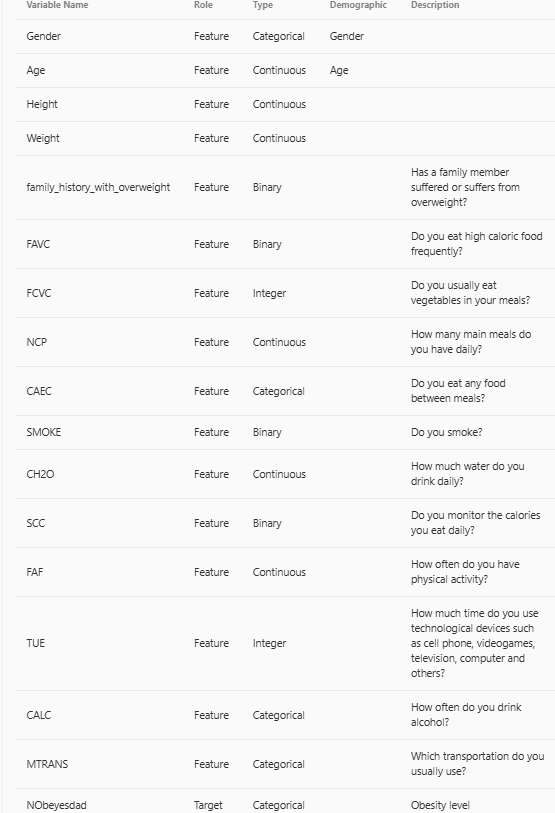

We didn't want to look at the relation between the variables in obesity data and weight basically as they must not be unhealthy if they are overweight. Since we did not have any variables related to their fat ratios, the best we can look at was their bmi ratios despite the insufficinecy of this statistics as well in showing the fat-muscle distirbution ratio in weight. 

We added a new column and named it "bmi".

In [4]:
odata_bmi<- odata %>% mutate( bmi = Weight / Height ^2)

Other than weight, height and age, there were some other continous-looking variables like CH20, NCP etc in the dataset. However, since their definitions are determined through categorical questions, we turned them into factors.

Also, another issue here was these categorical-in-nature variables were in double format, so there was a need to first round them to integers and then transform these variables into factor format.

After roundig them, I realized that since there were some points rounded a value that was not in between the boundaries of factor levels, I changed the boundary values for each of them and fitted them into the scale. 

In [5]:
odata_factor_floored <- copy(odata_bmi)

knifefunc <- function(the_list){
  the_name <- names(the_list)
  the_unique_quantile <- the_list %>% unlist %>% quantile %>% unique
  the_list %>% unlist %>% as.numeric %>% cut( breaks = the_unique_quantile  , labels = c(1:(length(the_unique_quantile)-1)), include.lowest = T)        
}
odata_normalized <- odata_bmi %>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE), BBmisc::normalize) #hocaya sor? FAF continuous
odata_normalized <- odata_bmi %>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE), knifefunc)

odata_factor_floored %<>% mutate_at(vars(FAF, FCVC, CH2O, TUE), function(x) x - x %% 1)
odata_factor_floored %<>% mutate(NCP = cut(odata$NCP , breaks = c(0, 1.5 , 3 , 5) , labels = c(0,1,2) , include.lowest = T )) 
odata_factor_floored %<>% mutate_at(vars(FAF, FCVC,  CH2O, TUE,SMOKE , CAEC, CALC ,SCC ,family_history_with_overweight , MTRANS , FAVC , Gender), as.factor)
odata_normalized %<>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE,SMOKE , CAEC, CALC ,SCC ,family_history_with_overweight , MTRANS , FAVC , Gender), as.factor)
colname_vector <- c("FAF", "FCVC", "NCP", "CH2O", "TUE")
midata <- cbind(odata_bmi,  odata_factor_floored %>% select(all_of(colname_vector)) , odata_normalized %>% select(all_of(colname_vector)) )
colnames(midata)[(length(odata_bmi)+1):length(midata)] <- c(sprintf("%s_floored" , colname_vector) , sprintf("%s_normalized" , colname_vector))
midata %<>% mutate_at( vars(SMOKE , CAEC, CALC ,SCC ,family_history_with_overweight , MTRANS , FAVC , Gender), as.factor)
midata[, c("FAF", "FCVC", "NCP", "CH2O", "TUE") := NULL]
midata %>% str                                    

Classes ‘data.table’ and 'data.frame':	2111 obs. of  23 variables:
 $ Gender                        : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 2 2 2 ...
 $ Age                           : num  21 21 23 27 22 29 23 22 24 22 ...
 $ Height                        : num  1.62 1.52 1.8 1.8 1.78 1.62 1.5 1.64 1.78 1.72 ...
 $ Weight                        : num  64 56 77 87 89.8 53 55 53 64 68 ...
 $ family_history_with_overweight: Factor w/ 2 levels "no","yes": 2 2 2 1 1 1 2 1 2 2 ...
 $ FAVC                          : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 2 1 2 2 ...
 $ CAEC                          : Factor w/ 4 levels "Always","Frequently",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ SMOKE                         : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ SCC                           : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ CALC                          : Factor w/ 4 levels "Always","Frequently",..: 3 4 2 2 4 4 4 4 2 3 ...
 $ MTRANS                    

Descriptive graphics for both continuous and categorical variables:

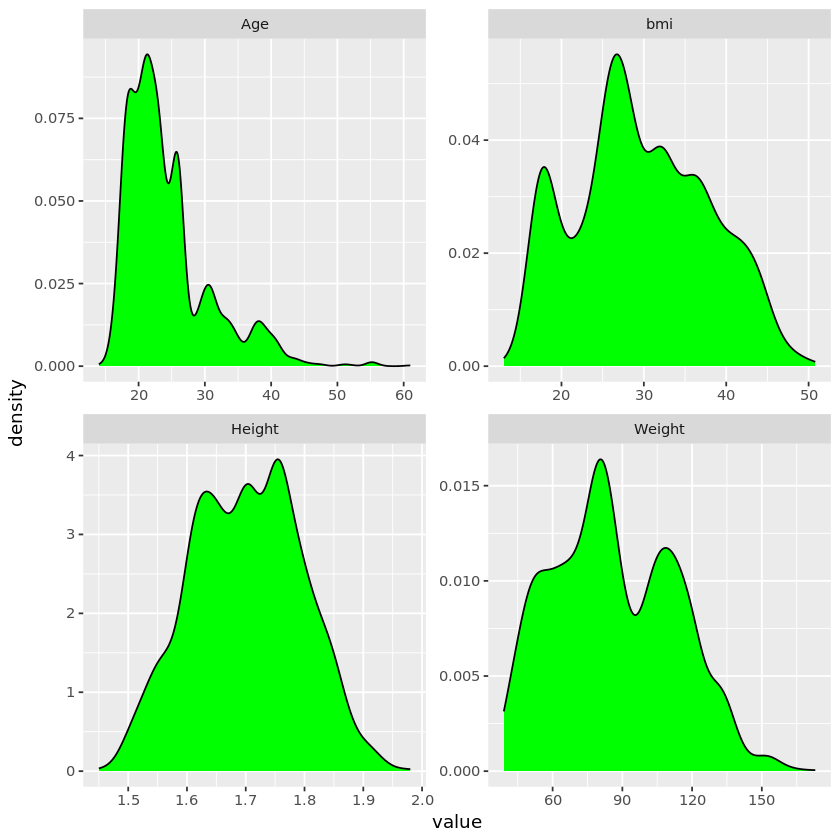

In [6]:
midata%>% select(Age, Height, Weight, bmi) %>%
    tidyr::gather() %>% # reshape into long format in columns "key" and "value"
    ggplot(aes(value)) + # plot value
        facet_wrap(~ key, scale = "free" ) + # divide into separate plots by key
        geom_density(fill = "green")  # get density plots

Warning message:
“attributes are not identical across measure variables; they will be dropped”


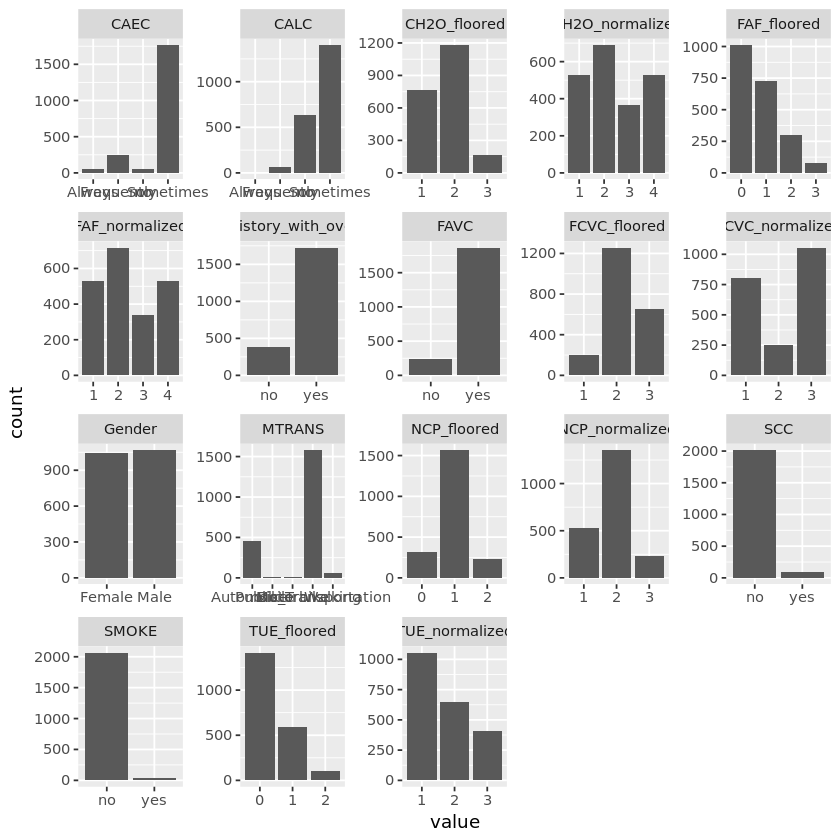

In [7]:
midata%>% select(!c(Age, Height, Weight, bmi, NObeyesdad)) %>%# select columns

    tidyr::gather() %>% # convert into long format for faceting
    ggplot(aes(x = value)) + # plot value
    facet_wrap(~ key, scales = "free") + # divide into separate plots by key
    geom_bar()

From the boxplots we created, we can say the categorical changes within;
Gender, 
CAEC, eating food between meals
SMOKE 
do not have a significant effect on bmi in our data.

But the rest show some correlations;

family_history_with_overweight,

FAVC, high caloried food consumption

FCVC, vegetable consumption

NCP, the number of meals in a day

CH2O, water consumption

SCC, keep track of calories

FAF, physical activity

TUE, the hours spent on social media

CALC, alcohol consumption

MTRANS, the type of transformation they use

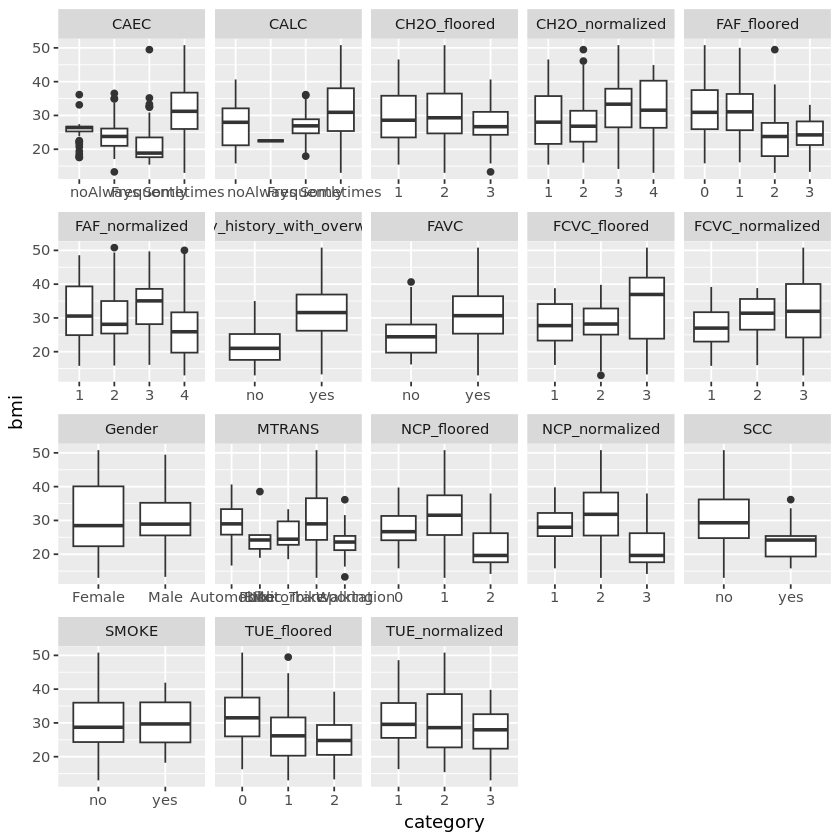

In [8]:
midata%>% pivot_longer(!c(Age, Height, Weight, bmi, NObeyesdad), names_to = "variable", values_to = "category") %>%
ggplot(aes(x = category, y = bmi)) +
geom_boxplot() +
facet_wrap(~ variable, scales = "free_x") ## hocaya sor!!!!!!!!!!!!!!!!!! 

So far what we have done is to get rid of the outliers in our data, we calculated the Z scores in two tales with .05 for te sake of a a model estimating our BMI results better. 

In [10]:
midata %<>% mutate(z_bmi = BBmisc::normalize(midata$bmi , method = "standardize"))
midata %<>% filter( z_bmi %between% c(-1.96,1.96))

We want to see if the data under the variables that can answer yes-no questions are distributed in a somewhat balanced way. To see it first we got rid off the continuous variables by keeping the factors. 

To determine a trashold, we divided the # of rows to 2. To turn them into logical values, we used basic logical tools and assigned them to the colums. After that, since "yes" and "no" logical values are corresponsing to 1 and 0 now, to implement some calculations, we used this feature. After subsetting the columns whose yes-no values cannot satisfy the treshold we created, "Gender" was the only remained categorical variable that we kept.

In [11]:
factors <- midata %>% keep(is.factor) %>% select(family_history_with_overweight, FAVC, SMOKE, SCC, Gender)
factors

family_history_with_overweight,FAVC,SMOKE,SCC,Gender
<fct>,<fct>,<fct>,<fct>,<fct>
yes,no,no,no,Female
yes,no,yes,yes,Female
yes,no,no,no,Male
no,no,no,no,Male
no,no,no,no,Male
no,yes,no,no,Male
yes,yes,no,no,Female
no,no,no,no,Male
yes,yes,no,no,Male


In [12]:
normx <- factors[,.N] / 2
normx

factors$family_history_with_overweight<-factors$family_history_with_overweight=="yes"
factors$FAVC<-factors$FAVC=="yes"
factors$SMOKE<-factors$SMOKE=="yes"
factors$SCC<-factors$SCC=="yes"
factors$Gender <- factors$Gender=="Female"

factors


[1] 1039

family_history_with_overweight,FAVC,SMOKE,SCC,Gender
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE


In [13]:
factors_select <- factors %>% 
colSums %>% # get total count of TRUE values
"-"(normx) %>% # subtract from half of row count
abs %>% # take absolute value
sort %>%#sort
.[. <= normx / 2] %>% # filter for those variables where the absolute difference if less than or equal to the quarter of total row count 
names # get the names

In [16]:
cor0 <- factors %>% select(all_of(factors_select)) %>% cor
cor0

,family_history_with_overweight,FAVC,SMOKE,SCC,Gender
family_history_with_overweight,1.0000000,0.20655752,0.01835200,-0.18463877,-0.10911954
FAVC,0.2065575,1.00000000,-0.04988086,-0.18967183,-0.07070588
SMOKE,0.0183520,-0.04988086,1.00000000,0.04725135,-0.04299033
SCC,-0.1846388,-0.18967183,0.04725135,1.00000000,0.10662591
Gender,-0.1091195,-0.07070588,-0.04299033,0.10662591,1.00000000


In [43]:
model_data_normalized <- midata %>% select(Gender,FAVC,SMOKE,SCC,family_history_with_overweight,Age, bmi, TUE_normalized, NCP_normalized, MTRANS, FCVC_normalized, FAF_normalized, CH2O_normalized, CALC, CAEC) %>% filter(Gender == "Male")
model_data_floored <- midata %>% select(Gender,FAVC,SMOKE,SCC,family_history_with_overweight,Age, bmi, TUE_floored, NCP_floored, MTRANS, FCVC_floored, FAF_floored, CH2O_floored, CALC, CAEC)  %>% filter(Gender == "Male")
model_data_normalized %<>% select(-Gender)
model_data_floored %<>% select(-Gender)

Partititon: We set the train ratio 0.7 as we used 0.7 to built the model and 0.3 to test the model if it can give nice results. We also checked the mutuality below.

In [44]:
set.seed(1000)
train_ratio <- 0.6

In [45]:
train_indices <- model_data_normalized[,sample(.N * train_ratio)]
train_data_n <- model_data_normalized[train_indices]
test_data_n <- model_data_normalized[-train_indices]
train_data_f <- model_data_floored[train_indices]
test_data_f <- model_data_floored[-train_indices]

In [46]:
model_data_normalized[,.N]
train_data_n[,.N]
test_data_n[,.N]
model_data_floored[,.N]
train_data_f[,.N]
test_data_f[,.N]

[1] 1066

[1] 639

[1] 427

[1] 1066

[1] 639

[1] 427

In [47]:
model1 <- lm(bmi ~ . , train_data_n)
model2 <- lm(bmi ~ . , train_data_f)

From the results we can observe, we couldn't see a very strong correlation between the dependent and independent variables but still the R-squared statitsics seems satisfactory as we have to consider that this is a real-life data and we are trying to build a model looking for a linear relationship between the variables, which cannot reflect non-linear relations that we might bump into in a real life. 

In [48]:
model1 %>% summary

model1 %>% tidy %>% filter(p.value < 0.1)

model2 %>% summary

model2 %>% tidy %>% filter(p.value < 0.1)


Call:
lm(formula = bmi ~ ., data = train_data_n)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.022  -1.981  -0.013   2.106  12.101 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       17.92216    4.00815   4.471 9.26e-06 ***
FAVCyes                           -0.26725    0.43485  -0.615  0.53905    
SMOKEyes                           1.39244    0.93404   1.491  0.13654    
SCCyes                            -0.23147    0.77760  -0.298  0.76606    
family_history_with_overweightyes  2.13236    0.38724   5.507 5.39e-08 ***
Age                                0.28650    0.02827  10.133  < 2e-16 ***
TUE_normalized2                   -0.76214    0.35297  -2.159  0.03122 *  
TUE_normalized3                   -1.26329    0.42518  -2.971  0.00308 ** 
NCP_normalized2                   -0.87738    0.37655  -2.330  0.02013 *  
NCP_normalized3                   -4.00733    0.50971  -7.862 1.72e-14 ***
MTRANSBike      

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),17.9221626,4.00814709,4.471433,9.263871e-06
family_history_with_overweightyes,2.1323584,0.38723739,5.506592,5.393242e-08
Age,0.2864972,0.02827234,10.133479,2.063026e-22
TUE_normalized2,-0.7621377,0.35296750,-2.159229,3.122089e-02
TUE_normalized3,-1.2632911,0.42518307,-2.971170,3.083275e-03
NCP_normalized2,-0.8773781,0.37654572,-2.330071,2.012716e-02
NCP_normalized3,-4.0073334,0.50970831,-7.862013,1.716390e-14
MTRANSPublic_Transportation,2.3684295,0.43337001,5.465144,6.743769e-08
MTRANSWalking,1.5875243,0.74920604,2.118942,3.449818e-02



Call:
lm(formula = bmi ~ ., data = train_data_f)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5760  -2.0492  -0.0776   2.1741  12.5657 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       16.39956    4.06742   4.032 6.23e-05 ***
FAVCyes                           -0.21313    0.44187  -0.482  0.62975    
SMOKEyes                           1.06069    0.94013   1.128  0.25966    
SCCyes                            -0.57652    0.80043  -0.720  0.47164    
family_history_with_overweightyes  2.11698    0.38548   5.492 5.84e-08 ***
Age                                0.28405    0.02860   9.932  < 2e-16 ***
TUE_floored1                      -1.54575    0.33910  -4.558 6.22e-06 ***
TUE_floored2                      -0.64124    0.60459  -1.061  0.28928    
NCP_floored1                      -0.60316    0.47289  -1.275  0.20262    
NCP_floored2                      -3.66753    0.58954  -6.221 9.16e-10 ***
MTRANS

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),16.3995616,4.06741890,4.031933,6.230553e-05
family_history_with_overweightyes,2.1169844,0.38547693,5.491858,5.836587e-08
Age,0.2840499,0.02859834,9.932393,1.179493e-21
TUE_floored1,-1.5457517,0.33909642,-4.558443,6.224862e-06
NCP_floored2,-3.6675263,0.58954151,-6.220981,9.161356e-10
MTRANSPublic_Transportation,2.1919377,0.43649596,5.021668,6.728552e-07
CH2O_floored3,1.4314147,0.55372399,2.585069,9.966149e-03
CAECFrequently,-1.9029316,0.81936725,-2.322440,2.053634e-02


To carry out an investigation to understand if there is a multicollinearity problem at a problematic degree, we used the vif model. Since we couldn't find any high-correlated variables in our model, we kept all the remaining variables.

In [26]:
vif(model1) %>% as.data.table(keep.rownames = T) %>%
setnames(c("rn", "GVIF", "Df", "VIFsqr")) %>%
.[] %>%
mutate(VIF = VIFsqr^2) %>%
filter(VIF > 10)

rn,GVIF,Df,VIFsqr,VIF
<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
gg_qqplot(model1, scale.factor = 1)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)

actual_train <- train_data$bmi
predicted_train <- predict(model1, train_data)

actual_test <- test_data$bmi
predicted_test <- predict(model1, test_data)

model_dt <- data.table(partition = c("train", "test"),
                       R2 = c(R2(predicted_train, actual_train),
                                R2(predicted_test, actual_test)),
                        RMSE = c(RMSE(predicted_train, actual_train),
                                 RMSE(predicted_test, actual_test)),
                        MAE = c(MAE(predicted_train, actual_train),
                                MAE(predicted_test, actual_test))
                        )

model_dt

data.table(actual = actual_train, predictions = predicted_train) %>%
ggplot(aes(x = actual, y = predictions)) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
ggtitle("Train Actual vs. Predictions")

data.table(actual = actual_test, predictions = predicted_test) %>%
ggplot(aes(x = actual, y = predictions)) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
ggtitle("Test Actual vs. Predictions")

In [ ]:
data.table(residuals = actual_train - predicted_train, predictions = predicted_train) %>%
ggplot(aes(x = predictions, y = residuals)) +
geom_point() +
ggtitle("Train Predictions vs. Residuals")

data.table(residuals = actual_test - predicted_test, predictions = predicted_test) %>%
ggplot(aes(x = predictions, y = residuals)) +
geom_point() +
ggtitle("Test Predictions vs. Residuals")

In [ ]:
model4 <- lm(bmi ~ Age + Gender + `NCP >3`  
+ MTRANSAutomobile + `FAF2-4` + `CH2O >2L` + CALCFrequently + CAECFrequently , train_data)